In [2]:
words = open("names.txt", "r").read().splitlines()
chars = sorted(list(set("".join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
import torch

In [19]:
N = torch.zeros((729, 27), dtype=torch.int32)

In [7]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [21]:
chars_and_dots = ['.'] + chars
bigrams = [char1 + char2 for char1 in chars_and_dots for char2 in chars_and_dots]
bigramtoi = {b:i for i,b in enumerate(bigrams)}
itobigram = {i:b for b,i in bigramtoi.items()}
len(bigramtoi)


729

In [22]:
for w in words:
  chs = ['.', '.'] + list(w) + ['.', '.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    bigram = ch1 + ch2
    ix1 = bigramtoi[bigram]
    ix2 = stoi[ch3]
    N[ix1, ix2] += 1



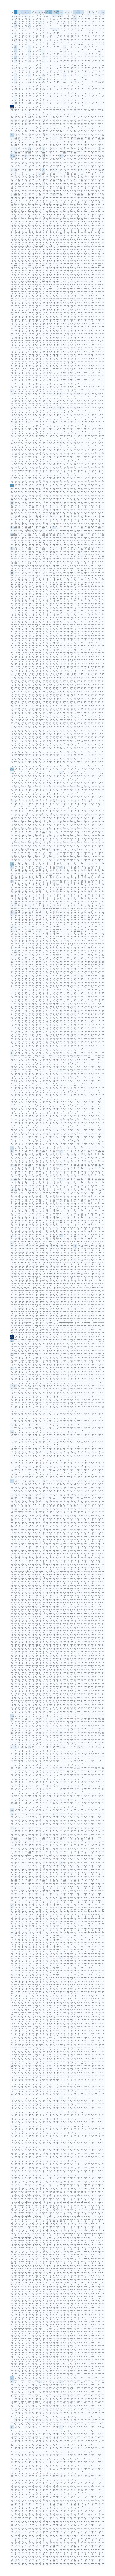

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(32,32), dpi = 1000)
plt.imshow(N, cmap='Blues')
for i in range(729):
    for j in range(27):
        chstr = itobigram[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray', fontsize=0.1)
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray', fontsize=0.1)
plt.axis('off');

In [36]:
g = torch.Generator().manual_seed(2147483647)
p = N[0].float()
p = p / p.sum()
p


tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [111]:
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [112]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [113]:
for i in range(10):
  out = []
  prev_two_chars = 0
  while True:
    p = P[prev_two_chars]
    next_char = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[next_char])
    prev_three_chars = itobigram[prev_two_chars] + itos[next_char]
    prev_two_chars = bigramtoi[prev_three_chars[1:]]
    if next_char == 0:
      break
  print("".join(out))


kaugue.
teda.
kaley.
maside.
en.
aviyah.
fobspihiliven.
tahlasuzusfxx.
an.
glhpynn.


In [114]:
log_likelihood = 0.0
n = 0

for w in words:
  chs = ['.', '.'] + list(w) + ['.', '.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    bigram = ch1 + ch2
    ix1 = bigramtoi[bigram]
    ix2 = stoi[ch3]
    prob = P[ix1, ix2]
    log_prob = torch.log(prob)
    log_likelihood += log_prob
    n += 1


print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')


log_likelihood=tensor(-505260.7500)
nll=tensor(505260.7500)
1.9419735670089722
